# PRÁCTICA 2: tipologia y ciclo de vida de los datos

LAURA BELENGUER QUEROL Y LEIRE ALEGRIA MURILLO

In [1]:
#Importing required packages
import numpy as np
import pandas as pd

### Graphic libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1. Descripción del dataset

Leemos los datos de la librería Kaggle indicada en el ejercicio
Tenemos 1599 observaciones y 12 variables

In [2]:
# Cargamos los datos
wine = pd.read_csv('winequality-red.csv') 

In [3]:
# Dimension del dataset
wine.shape

(1599, 12)

In [4]:
# Observamos nuestros datos y comprobamos que esten bien cargados
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 1.1. Análisis de la variable target

Su valor está entre 0 y 10. Observamos que solo tenemos valores entre 3 y 8. La mayoría de los vinos tienen una calificacion de 5 o 6.

In [5]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

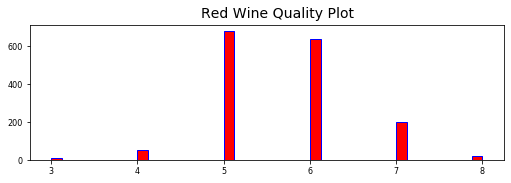

In [6]:
# Target distribution
wine['quality'].hist(bins=40, edgecolor='b', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False, figsize=(6,2), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Red Wine Quality Plot', x=0.65, y=1.25, fontsize=14);

Si un vino es excelente tiene una nota de 7 o superior, por lo que mas adelante creamos una variable llamada 'rating' donde clasificamos los vinos entre 'superior','inferior' o 'correcto'. Si su nota es superior a 7 sera superior, de lo contrario sera inferior.

In [7]:
wine.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

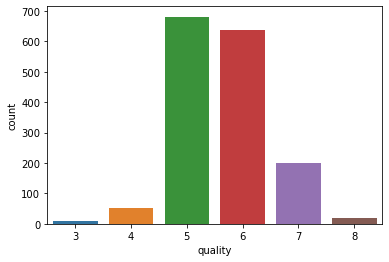

In [8]:
sns.countplot(x='quality', data=wine)

### 1.2 Análisis del resto de variables 

Mostramos los valores estadísticos de cada atributo.

In [9]:
#Informacion sobre las columnas
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Calculámos el histograma de cada atributo.

In [10]:
target_wine = wine['quality']
data_wine = wine.drop(columns = ['quality'])

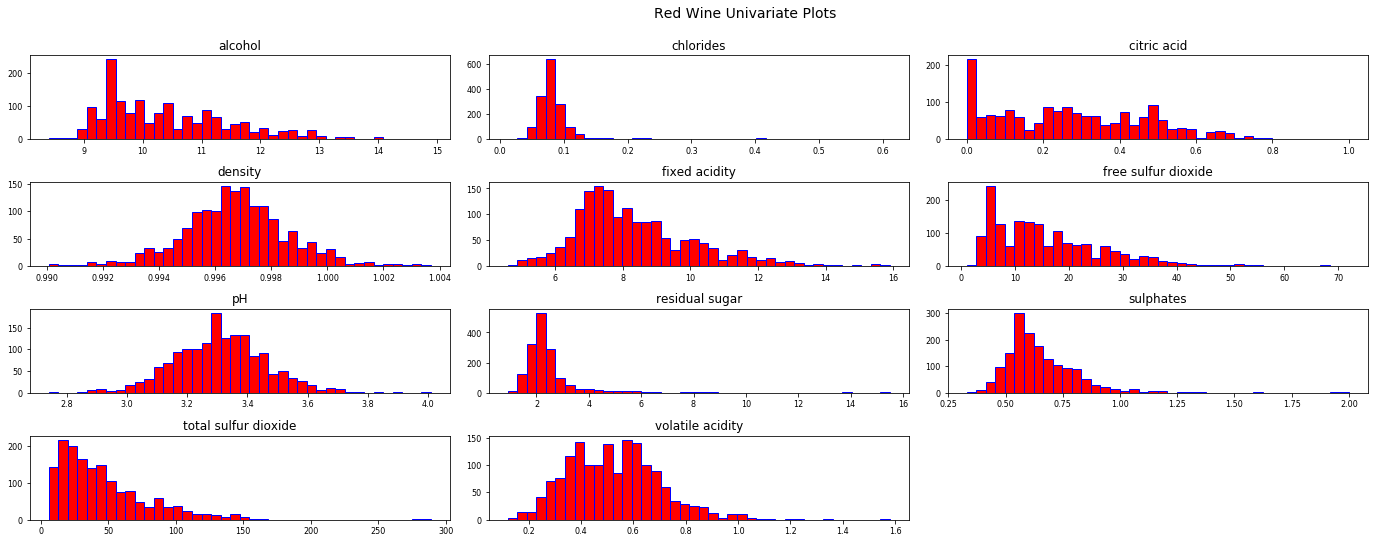

In [11]:
# Histogramas de todas las variables
data_wine.hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=14);

## 2. Integración y selección de los datos de interés a analizar

### 2.1. Integración

En este caso los datos se encuentran todos en el mismo dataset, por lo tanto no hay que integrar datos de otro dataset.

Renombramos los nombres de los atributos para eliminar los espacio en blanco

In [12]:
wine.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
wine.head(n=5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2.2. Selección

Una de las primeras etapas en el preprocesado de los datos es el filtrado o selección de datos de interés.

En esta fase también es habitual realizar una exploración de los datos.

El preprocesado de los datos también puede incluir la creación de nuevas variables a partir de la extracción de características de los datos originales. Realizaremos está reducción con la variable 'quality'.

In [13]:
# Basado en las categorías encontradas en el apartado anterior para 'quality'
# creamos una nueva variable 'rating' con 3 categorias para los vinos
conditions = [
    (wine['quality'] > 5),
    (wine['quality'] <= 5)
]
rating = ['1', '0']
wine['rating'] = np.select(conditions,rating)
wine.rating.value_counts()

1    855
0    744
Name: rating, dtype: int64

In [14]:
wine.groupby('rating').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
0,8.142204,0.589503,0.237755,2.542070,0.092989,16.567204,54.645161,0.997068,3.311653,0.618535,9.926478,4.901882
1,8.474035,0.474146,0.299883,2.535965,0.082661,15.272515,39.352047,0.996467,3.310643,0.692620,10.855029,6.274854


## 3. Limpieza de los datos 

### 3.1. ¿Los datos contienen ceros o elementos vacíos? ¿Cómo gestionarías cada uno de estos casos? 

In [15]:
# Comprobamos si faltan valores "missing values"
print(wine.isna().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
rating                  0
dtype: int64


In [16]:
# Comprobamos si hoy valores nulos
print(wine.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
rating                  0
dtype: int64


En caso que hubiesen datos NaN en alguna de las columnas, utilizariamos: wine.dropna() para eliminar aquellas filas que contienen dichos valores NaN.

### 3.2. Identificación y tratamiento de valores extremos

Los valores extremos (extreme scores o outliers) son aquellos datos que se encuentran muy alejados de la distribución normal de una variable o población.

Son observaciones que se desvían tanto del resto que levantan sospechas sobre si fueron generadas mediante el mismo mecanismo. 

Estos valores pueden afectar de forma adversa los resultados de los análisis posteriores, al incrementar el error en la varianza de los datos y sesgar significativamente los cálculos y estimaciones.

En el apartado 1.2 hemos visto que algunas variables/atributos tienen una desviación standard (std) bastante elevada si observamos el valor de la media.

- citric acid

- volatile acidity

- residual sugar

- chlorides

- free sulfur dioxide

- total sulfur dioxide

Con los gráficos boxplot analizamos las variables de manera visual.

También basados en los valores de calidad, visualizamos como dichos parámetros afectan a la calidad del vino.

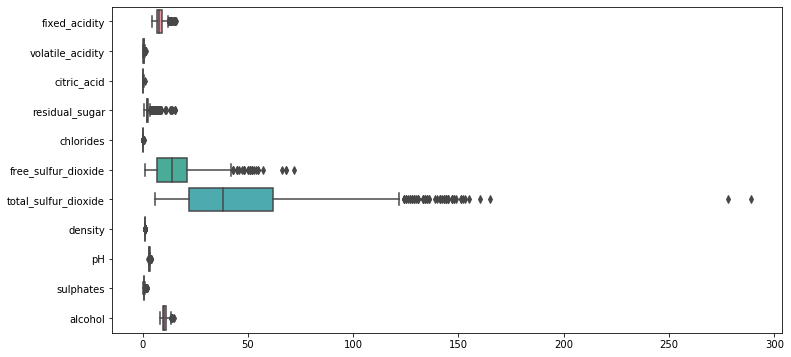

In [17]:
# Mostramos el boxplot de las variables (menos 'rating')
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=wine.drop(columns = ['quality','rating']), orient="h")

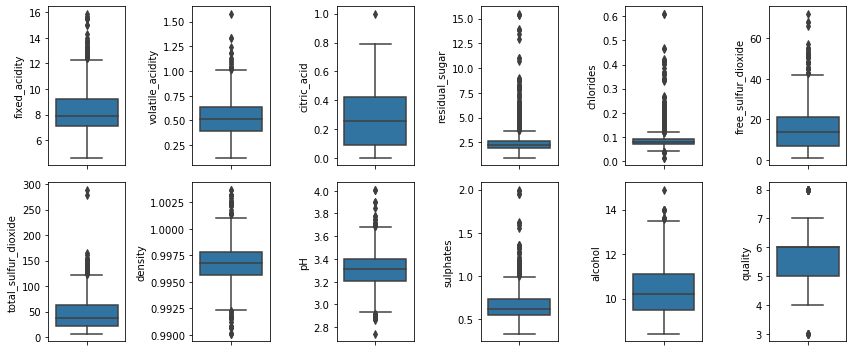

In [18]:
#Analizamos las variables una por una
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(12,5))

for i, ax in enumerate(axes.flatten()):
    sns.boxplot(y= wine.iloc[:, i],  orient='v' , ax=ax)

fig.tight_layout()

Observamos que 'casi todas las variables presentan valores extremos. Podríamos identificar como outliers aquellos puntos que se encuentran, unidimensionalmente a más de 2 desviaciones estándar de la media (Distancia Mahalanobis)

In [19]:
data_wine_nout = data_wine[data_wine.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis=1)]
print(data_wine_nout.shape)

# Estadísticas sin outliers y sin variable quality/rating
data_wine_nout.describe()

(1124, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.00000,1124.000000,1124.000000
mean,8.163078,0.518283,0.247589,2.264724,0.080899,14.591637,40.755338,0.996645,3.32113,0.632438,10.309638
std,1.365514,0.155680,0.177490,0.615027,0.017886,8.327425,24.493584,0.001448,0.12357,0.117353,0.903107
min,5.200000,0.180000,0.000000,1.200000,0.038000,1.000000,6.000000,0.993060,3.02000,0.330000,8.500000
25%,7.200000,0.398750,0.090000,1.900000,0.071000,8.000000,22.000000,0.995648,3.23000,0.550000,9.500000
50%,7.800000,0.520000,0.240000,2.100000,0.079000,13.000000,35.000000,0.996640,3.32000,0.610000,10.100000
75%,9.000000,0.630000,0.390000,2.500000,0.088250,20.000000,54.000000,0.997505,3.40000,0.700000,11.000000
max,11.800000,0.885000,0.660000,5.200000,0.178000,36.000000,112.000000,1.000400,3.61000,0.990000,12.500000


Verificamos los resultados comparándolos con los originales 

In [20]:
# Estadísticas datos originales sin la variable quality/rating
data_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


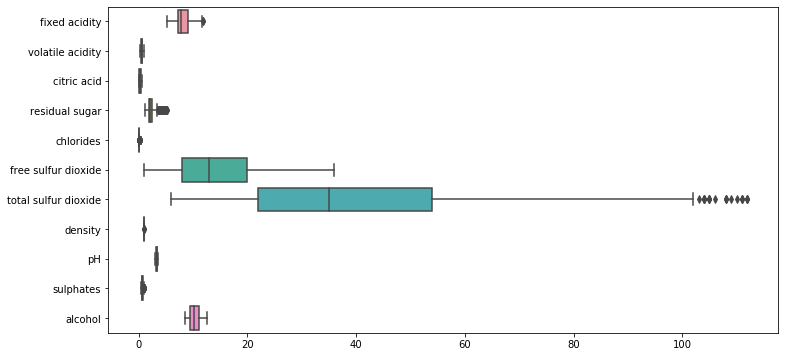

In [21]:
# Mostramos el boxplot de las variables (menos 'quality'/'rating')
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=data_wine_nout, orient="h")

Aplicando el criterio de Mahalanobis para eliminar los valores extremos hemos reducido el tamaño de nuestro dataset de 1599 muestras a 1124. Con los boxplots vemos que se han reducido considerablemente los outliers para la mayoría de variables. Aunque ciertas variables como 'residual sugar' y 'chlorides' presentan un alto número de valores por encima del tercer cuartil (75% de los datos).

De todos modos eliminar dichos valores extremos puede dar lugar a eliminar aquellos vinos que marcan la diferencia por atributos excepcionales, por ello nos quedaremos con los atributos originales sin eliminar ningún outlier.

#### Valores duplicados

In [22]:
extra = wine[wine.duplicated()]
extra.shape

(240, 13)

Hay 240 valores duplicados, pero no los eliminamos ya que pueden deberse a calificaciones idénticas dadas por diferentes 
catadores.

# 4. Análisis de los datos.

## 4.1. Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar). 

En los siguientes apartados realizaremos el análisis inferencial que tiene por objetivo modelar los datos a través de una distribución conocida. Partiendo de la premisa que el conjunto de datos estudiado representa una fracción de la totalidad de una población, su objetivo es inferir cómo es esa población, asumiendo un grado de error en las estimaciones por el hecho de disponer de una muestra reducida de los datos.

## 4.2. Comprobación de la normalidad y homogeneidad de la varianza.

***Normalidad***

Para la comprobación de que los valores que toman nuestras variables cuantitativas provienen de una población distribuida normalmente, utilizaremos la prueba de normalidad de Shapiro. 

Se comprueba que para que cada prueba se obtiene un p-valor superior al nivel de signiﬁcación preﬁjado α = 0.05. Si esto se cumple, entonces se considera que dicha variable sigue una distribución normal.

H_0 = Tiene una distribución normal

H_1 = No tiene una distribución normal

p <= alpha: rechazamos H_0, no hay normalidad.

p > alpha: no rechazamos H_0, hay normalidad.

In [23]:
from numpy.random import seed
from numpy.random import randn

In [24]:
from scipy.stats import shapiro

# Los atributos y target
names = list(wine.columns)

# no consideramos 'rating'
for i in range(len(names)-1):
    stat, p = shapiro(wine.iloc[:, i])
    print(names[i], ': p = %.3f' % (p))

fixed_acidity : p = 0.000
volatile_acidity : p = 0.000
citric_acid : p = 0.000
residual_sugar : p = 0.000
chlorides : p = 0.000
free_sulfur_dioxide : p = 0.000
total_sulfur_dioxide : p = 0.000
density : p = 0.000
pH : p = 0.000
sulphates : p = 0.000
alcohol : p = 0.000
quality : p = 0.000


Todas las variables tienen el p valor inferior a 0.05, por lo tanto, ninguna variable sigue una distribución normal.

***Homogeneidad***

Cuando los datos no cumplen con la condición de normalidad, cómo hemos visto en el apartado anterior, utilizamos el test Fligner-Killeen

La hipótesis nula asume igualdad de varianzas en los diferentes grupos de datos, por lo que p-valores inferiores al nivel de significancia (0.05) indicán heterocedasticidad.

En este caso lo aplicaremos a todas las variables, comparando los atributos (data_wine) con la variable target (quality)

In [25]:
# Aplicamos la prueba de Fligner
from scipy.stats import fligner

names = list(data_wine.columns)

# Consideramos las variables/atributos y la comparamos con quality
for i in range(len(names)):
    stat, p = fligner(data_wine.iloc[:, i], wine['quality'])
    print(names[i], ': p = %.3f' % (p))

fixed acidity : p = 0.000
volatile acidity : p = 0.000
citric acid : p = 0.000
residual sugar : p = 0.001
chlorides : p = 0.000
free sulfur dioxide : p = 0.000
total sulfur dioxide : p = 0.000
density : p = 0.000
pH : p = 0.000
sulphates : p = 0.000
alcohol : p = 0.000


Encontramos por tanto Heterocedastidad

## 4.3. Aplicación de pruebas estadísticas para comparar los grupos de datos. 
#### En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc. Aplicar al menos tres métodos de análisis diferentes.

### ***Contraste de hipótesis***

* #### **Test Mann Whitney**

En el caso que consideremos 2 niveles para la variable 'rating' o podemos utilizar también la variable 'quality' directamente

In [26]:
from scipy.stats import mannwhitneyu

for i in range(len(names)):
    stat, p = mannwhitneyu(wine.iloc[:, i][wine['quality']<=5], wine.iloc[:, i][wine['quality']>5])
    print(names[i], ': p = %.3f' % (p))

fixed acidity : p = 0.001
volatile acidity : p = 0.000
citric acid : p = 0.000
residual sugar : p = 0.290
chlorides : p = 0.000
free sulfur dioxide : p = 0.016
total sulfur dioxide : p = 0.000
density : p = 0.000
pH : p = 0.418
sulphates : p = 0.000
alcohol : p = 0.000


Se comprueba que para que cada prueba se obtiene un p-valor superior al nivel de signiﬁcación preﬁjado α = 0.05. Si esto se cumple, entonces se considera que dicha variable sigue una distribución normal.

Por lo tanto aquellas variables con un p-valor mayor al nivel de significación son:

**Residual sugar, pH**

* #### **Test Kruskal-Wallis**

En el caso que consideremos más de dos grupos, utilizamos el Test Kruskal-Wallis. Para ello utilizamos 3 niveles con la variable 'quality'

In [27]:
from scipy.stats import kruskal

for i in range(len(names)):
    stat, p = kruskal(wine.iloc[:, i][wine['quality']<5], 
                      wine.iloc[:, i][(wine['quality']==5) | (wine['quality']==6)],
                      wine.iloc[:, i][wine['quality']>6])
    print(names[i], ': p = %.3f' % (p))

fixed acidity : p = 0.000
volatile acidity : p = 0.000
citric acid : p = 0.000
residual sugar : p = 0.054
chlorides : p = 0.000
free sulfur dioxide : p = 0.000
total sulfur dioxide : p = 0.000
density : p = 0.000
pH : p = 0.000
sulphates : p = 0.000
alcohol : p = 0.000


En este caso la única variable significativa, casi in extremis, es **residual sugar**

### ***Correlación***

Procedemos a realizar un análisis de correlación entre las distintas variables para determinar cuáles de ellas ejercen una mayor inﬂuencia sobre la calidad del vino. Se utilizará el coeﬁciente de correlación de Person.

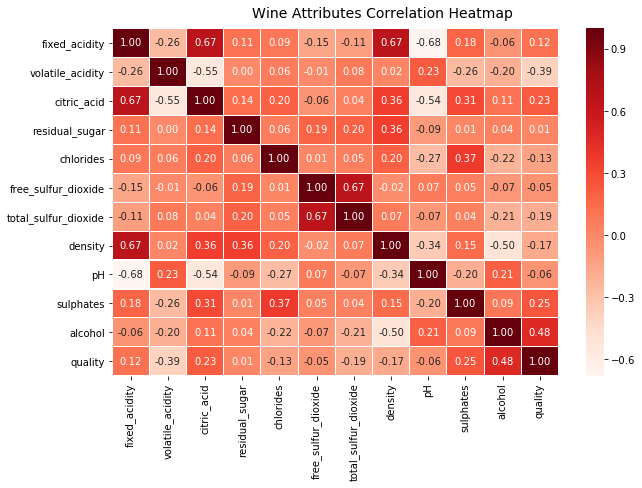

In [28]:
# Matriz de correlaciones

f, ax = plt.subplots(figsize=(10, 6))
corr = wine.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Reds",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

In [29]:
#correlations = wine.corr()['quality'].drop(['quality'])
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

Observamos que 'alcohol', 'sulphates', 'citric acid'  'fixed acidity' tienen una correlación máxima con 'quality'

### ***Regresiones***

In [30]:
# definimos las variables X (atributos) y target('rating')
X = wine.drop(columns = ['quality','rating'])
y1 = wine['rating']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

# Creamos los datos de entrenamiento y test utilizando train_test_split. Un 20% de los datos se utilizan para test y el 75% 
# para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=1)

In [32]:
# Ajustamos la regresión lineal a los datos de entrenamiento
regressor = LinearRegression()
regressor.fit(X_train,y_train)
  
# Con ello conseguimos los coeficientes de 10 atributos
regressor.coef_

array([ 3.62472427e-02, -5.56586890e-01, -2.30744839e-01,  1.32580728e-02,
       -6.42941197e-01,  4.50229553e-03, -3.19384631e-03, -1.56981033e+01,
        3.25706927e-02,  5.02188684e-01,  1.44945861e-01])

In [33]:
# Para predecir la calidad del vino con este módelo, usamos 'predict()'
train_pred = regressor.predict(X_train)
test_pred = regressor.predict(X_test)

La precisión del Regresor Lineal

In [34]:
accuracy = regressor.score(X_test, y_test)
print(accuracy)

0.3159314327509717


El RMSE es una medida que se utiliza para identificar las diferencias entre los valores.
Si hemos construido un buen módelo el RMSE debe ser muy similar. 
Si el RMSE es mayor para el test que para en train, seguramente tengamos un mal ajuste de los datos.

In [35]:
# Calculamos el  Root mean squared error (RMSE) para los datos de training como de test
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
print(train_rmse)
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
print(test_rmse)

0.41990432194661487
0.41325131452493113


Los resultados para RMSE del train y test son bastante similares, por lo tanto hemos construido un buen módelo.

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

# Mostramos los coeficientes para cada atributo
coeff = pd.DataFrame(regressor.coef_, list(data_wine.columns)) 
coeff.columns = ['Coefficient'] 
print(coeff)

Mean Absolute Error: 0.3535487023833562
Mean Squared Error: 0.17077664895658357
RMSE: 0.41325131452493113
                      Coefficient
fixed acidity            0.036247
volatile acidity        -0.556587
citric acid             -0.230745
residual sugar           0.013258
chlorides               -0.642941
free sulfur dioxide      0.004502
total sulfur dioxide    -0.003194
density                -15.698103
pH                       0.032571
sulphates                0.502189
alcohol                  0.144946


Estos coeficientes explican que si aumentamos en 1 unidad los 'sulphates', la calidad del vino aumentará un 0.50.
Igualmente para otras variables. Las negativas como density 1 unidad de este atributo reducirá la calidad del vino en 15.

### ***Random Forest - Arbol de decisión***

In [37]:
# llamamos al clasificador
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix

rfc = RandomForestClassifier(random_state=1)

In [38]:
# Calculamos la  k-fold cross validation en el conjunto de entrenamiento para obtener la precisión

cv_scores = cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy')

print('La precisión en cada iteración {}'.format(cv_scores))
print('La precisión media {}'.format(cv_scores.mean()))

La precisión en cada iteración [0.73828125 0.75390625 0.7734375  0.80078125 0.74509804]
La precisión media 0.7623008578431373


In [39]:
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [40]:
print(accuracy_score(y_test, pred_rfc))
print(log_loss(y_test, pred_rfc))

0.809375
6.584024215054993


In [41]:
print(confusion_matrix(y_test, pred_rfc))

[[126  28]
 [ 33 133]]


Hay un total de 61 errores de clasificación

Una prediccion de 80% parece bastate buena para seleccionar el árbol de decisión como un clasificador recomendable para clasificar el vino tinto como '1' (>5) or "0" (<=5).

# 5. Representación de los resultados a partir de tablas y gráficas.

De los resultados anteriores, seleccionamos los atributos seleccionados en el apartado anterior:
    
'residual sugar', 'pH','volatile acidity','total sulfur dioxide', 'sulphates', 'alcohol','chlorides', 'citric acid', 'density'

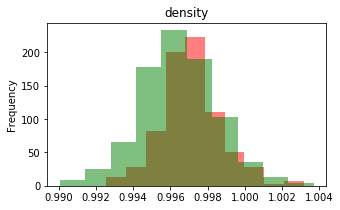

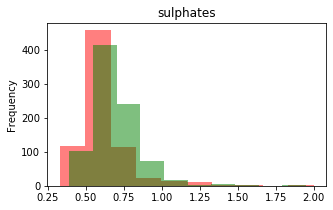

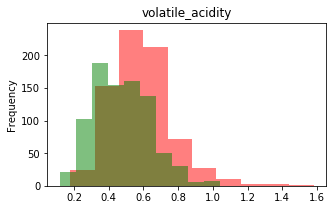

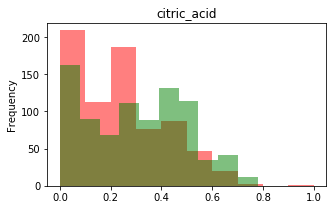

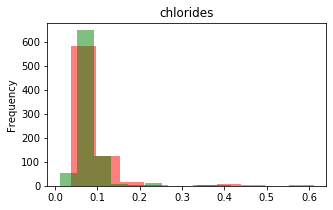

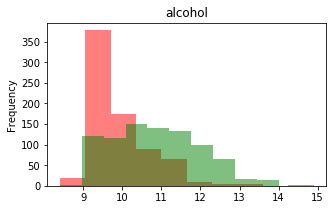

In [42]:
# Si consideramos algunas de las variables significativas encontradas en el apartado anterior

feats_to_explore = ['density','sulphates','volatile_acidity','citric_acid','chlorides', 'alcohol']

for i in feats_to_explore:
    plt.figure(figsize=(5,3))
    wine[i][wine['rating'] == '0'].plot.hist(alpha = 0.5, color = 'red', title = i)
    wine[i][wine['rating'] == '1'].plot.hist(alpha = 0.5, color = 'green')
    plt.show()

### ALCOHOL vs RATING

[Text(0, 0.5, 'Alcohol'),
 Text(0.5, 0, 'Rating Calidad'),
 Text(0.5, 1.0, 'Alcohol vs Rating Calidad')]

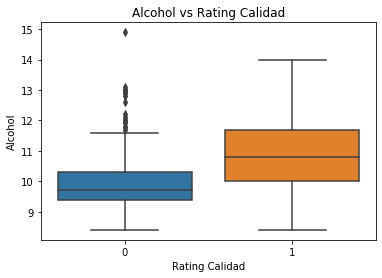

In [43]:
bx = sns.boxplot(x="rating", y='alcohol', data = wine)
bx.set(xlabel='Rating Calidad', ylabel='Alcohol', title='Alcohol vs Rating Calidad')

### DENSITY vs RATING

[Text(0, 0.5, 'Sulphates'),
 Text(0.5, 0, 'Rating'),
 Text(0.5, 1.0, 'Density vs Rating')]

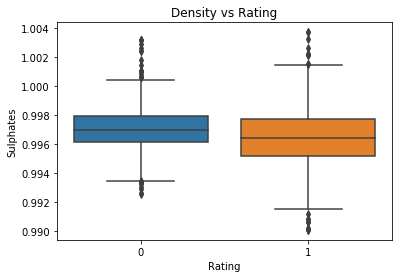

In [44]:
bx = sns.boxplot(x="rating", y='density', data = wine)
bx.set(xlabel='Rating', ylabel='Sulphates', title='Density vs Rating')

### SULPHATES vs RATING

[Text(0, 0.5, 'Sulphates'),
 Text(0.5, 0, 'Rating'),
 Text(0.5, 1.0, 'Sulphates vs Rating')]

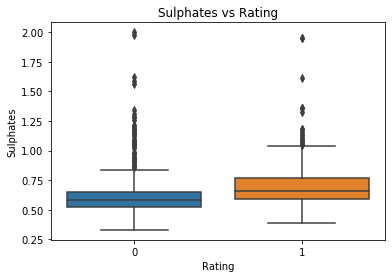

In [45]:
bx = sns.boxplot(x="rating", y='sulphates', data = wine)
bx.set(xlabel='Rating', ylabel='Sulphates', title='Sulphates vs Rating')

### CITRIC ACID vs RATING

[Text(0, 0.5, 'Citric Acid'),
 Text(0.5, 0, 'Rating'),
 Text(0.5, 1.0, 'Citric Acid vs Rating')]

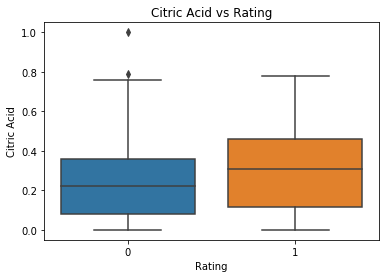

In [46]:
bx = sns.boxplot(x="rating", y='citric_acid', data = wine)
bx.set(xlabel='Rating', ylabel='Citric Acid', title='Citric Acid vs Rating')

### VOLATILE ACIDITY vs RATING

[Text(17.200000000000003, 0.5, 'Volatile Acidity'),
 Text(0.5, 17.200000000000003, 'Rating'),
 Text(0.5, 1, 'Volatile Acidity vs Rating')]

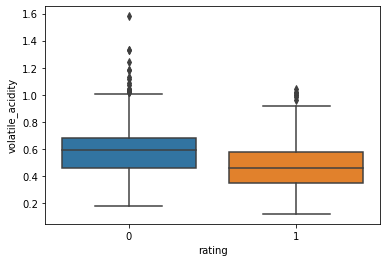

In [47]:
x = sns.boxplot(x="rating", y='volatile_acidity', data = wine)
bx.set(xlabel='Rating', ylabel='Volatile Acidity', title='Volatile Acidity vs Rating')

### CHLORIDES vs RATING

[Text(0, 0.5, 'chlorides'),
 Text(0.5, 0, 'Ratings'),
 Text(0.5, 1.0, 'chlorides vs Ratings')]

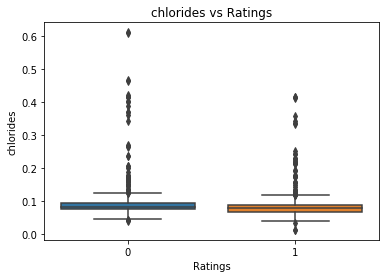

In [48]:
bx = sns.boxplot(x="rating", y="chlorides", data = wine);
bx.set(xlabel='Ratings', ylabel='chlorides', title='chlorides vs Ratings')

### LINEAR REGRESSION

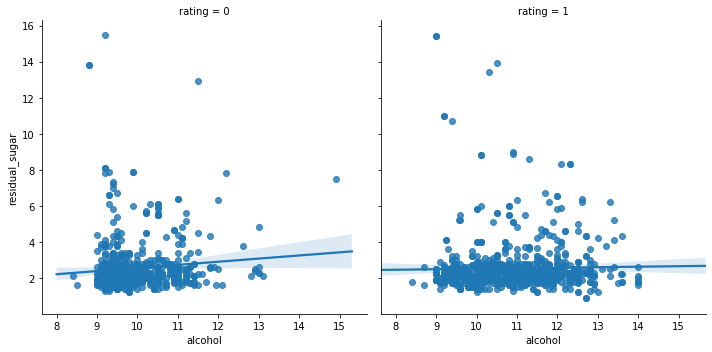

In [49]:
sns.lmplot(x = "alcohol", y = "residual_sugar", col = "rating", data = wine)

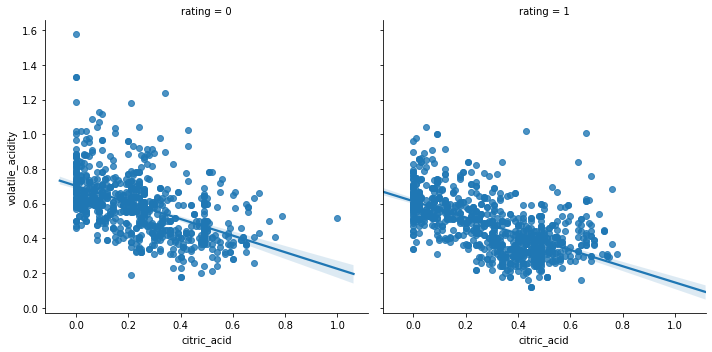

In [50]:
sns.lmplot(x = "citric_acid", y = "volatile_acidity", col = "rating", data = wine)

### Biografia

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009

https://github.com/ranjitkumarpatnaik/winequality-redwine/blob/master/winequality-red.ipynb
https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine
http://rpubs.com/jeswin_george/explore_red_quality_wines
https://github.com/paulgx/tipologiapractica2/blob/master/practica2Tipologia.pdf
https://www.kaggle.com/datacog314/tutorial-machine-learning-interpretability

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

Donde se pueden descargar los datos:

https://archive.ics.uci.edu/ml/datasets/wine+quality